# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [62]:
import pandas as pd #Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.

In [63]:
airbnb2_df = pd.read_csv("airbnb_hw-2.csv") #Read in the CSV file

airbnb2_df.head() #Generate the first few rows
airbnb2_df.tail() #Generate the last few erows

airbnb2_df.shape #Generate shape

(30478, 13)

In [64]:
airbnb2_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [65]:
print("Missing values per column:") #Check for missing values
print(airbnb2_df.isna().sum())

airbnb2_df.dtypes #Check dtypes

airbnb2_df.dropna(inplace = True) #Drop rows with missing values

airbnb2_df.columns

Missing values per column:
Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64


Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [66]:
airbnb2_df.dtypes #Check dtypes

,0
Host Id,int64
Host Since,object
Name,object
Neighbourhood,object
Property Type,object
Review Scores Rating (bin),float64
Room Type,object
Zipcode,float64
Beds,float64
Number of Records,int64


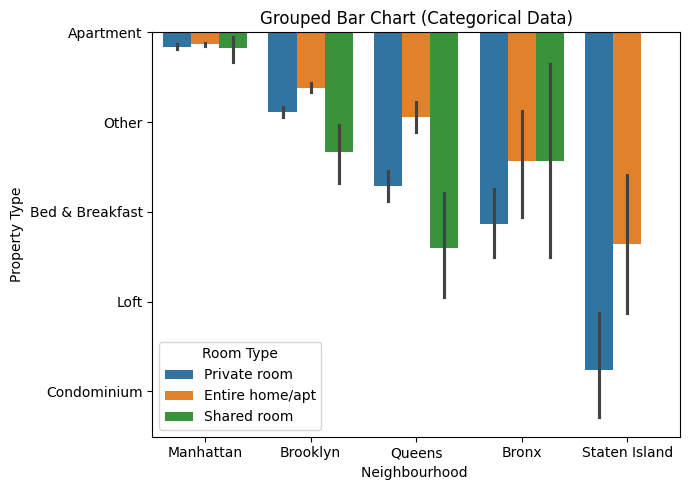

In [67]:
plt.figure(figsize=(7,5)) #Visualization #1
sns.barplot(data=airbnb2_df, x='Neighbourhood ', y='Property Type', hue='Room Type')
plt.title('Grouped Bar Chart (Categorical Data)')
plt.xlabel('Neighbourhood ')
plt.ylabel('Property Type')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

In [68]:
airbnb2_df['Price'] = airbnb2_df['Price'].str.replace(',', '').astype(float) #Cleaned the Price column (replaced commas, white spaces)

In [69]:
airbnb2_df['Neighbourhood'] = airbnb2_df['Neighbourhood '].str.replace(' ', '') #Cleaned

In [70]:
airbnb2_df.rename(columns={'Number Of Reviews': 'Number of Reviews'}, inplace=True) #Cleaned

In [71]:
airbnb2_df.rename(columns={'Review Scores Rating (bin)': 'Review Scores Rating'}, inplace=True) #Cleaned

In [72]:
pd.crosstab(airbnb2_df['Price'], airbnb2_df['Property Type']) #Crosstab

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Townhouse,Treehouse,Villa
Price,,,,,,,,,,,,,,,,,,
10.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
24.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


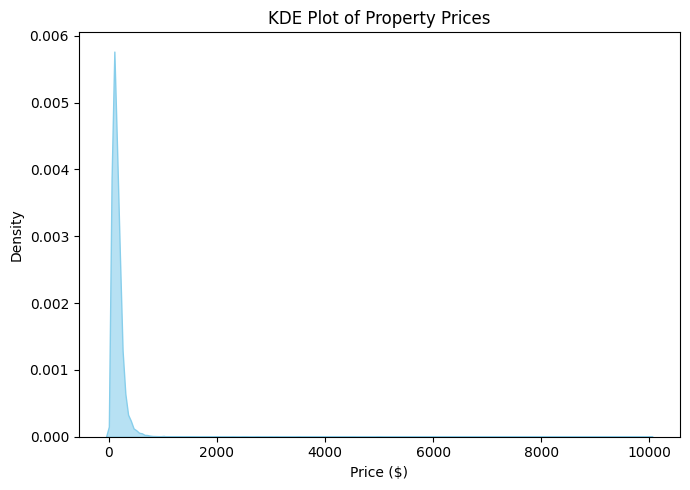

In [73]:
plt.figure(figsize=(7,5)) #Generate KDE plot (Visualization #2)
sns.kdeplot(data=airbnb2_df, x='Price', fill=True, color='skyblue', alpha=0.6)
plt.title('KDE Plot of Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

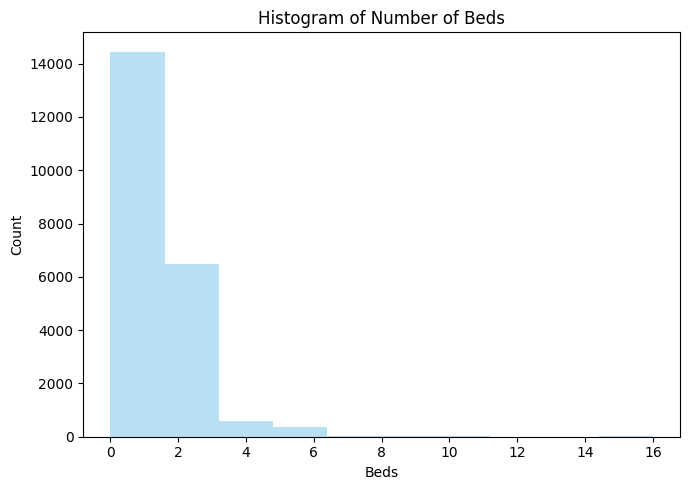

In [74]:
plt.figure(figsize=(7,5)) #Generate KDE plot
plt.hist(data=airbnb2_df, x='Beds', fill=True, color='skyblue', alpha=0.6)
plt.title('Histogram of Number of Beds')
plt.xlabel('Beds')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [75]:
pd.crosstab(airbnb2_df['Beds'], airbnb2_df['Room Type']) #Crosstab

Room Type,Entire home/apt,Private room,Shared room
Beds,,,
0.0,0,1,0
1.0,6417,7616,419
2.0,3985,859,74
3.0,1422,139,19
4.0,542,36,18
5.0,216,4,2
6.0,131,6,9
7.0,34,4,0
8.0,15,1,0


In [76]:
pd.crosstab(airbnb2_df['Price'], airbnb2_df['Number of Records']) #Crosstab

Number of Records,1
Price,
10.0,1
20.0,1
21.0,1
22.0,1
24.0,2
...,...
3100.0,1
3500.0,1
4500.0,1


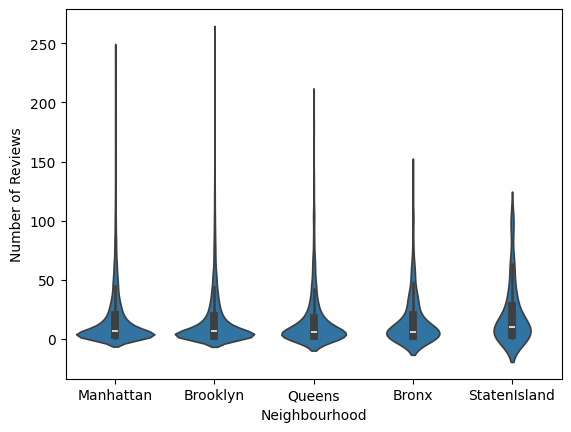

In [77]:
sns.violinplot(data=airbnb2_df, x='Neighbourhood', y="Number of Reviews") #Create a plot with a grouping variable
plt.show()

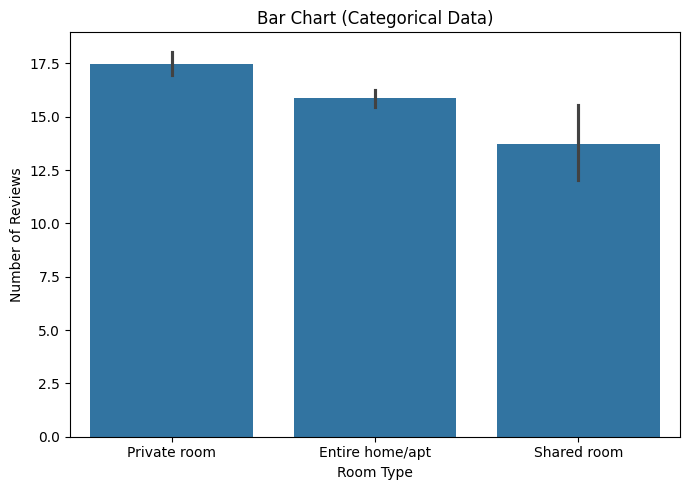

In [78]:
plt.figure(figsize=(7,5))
sns.barplot(data=airbnb2_df, x='Room Type', y='Number of Reviews')
plt.title('Bar Chart (Categorical Data)')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

<Axes: xlabel='Beds', ylabel='Price'>

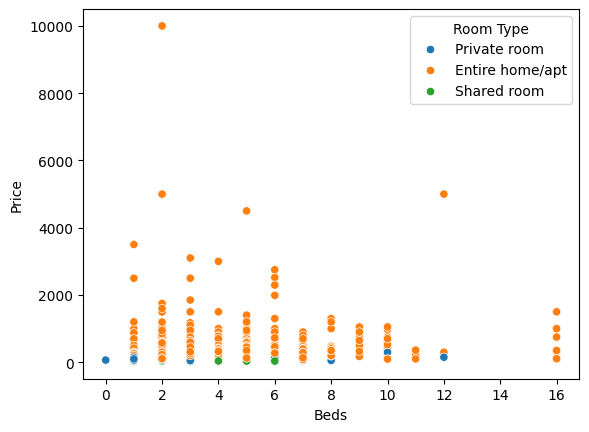

In [79]:
sns.scatterplot(data=airbnb2_df, x='Beds', y='Price', hue='Room Type')

In [80]:
pd.crosstab(airbnb2_df['Price'], airbnb2_df['Neighbourhood']) #Crosstab

Neighbourhood,Bronx,Brooklyn,Manhattan,Queens,StatenIsland
Price,,,,,
10.0,1,0,0,0,0
20.0,0,1,0,0,0
21.0,1,0,0,0,0
22.0,1,0,0,0,0
24.0,0,2,0,0,0
...,...,...,...,...,...
3100.0,0,1,0,0,0
3500.0,0,0,1,0,0
4500.0,0,1,0,0,0


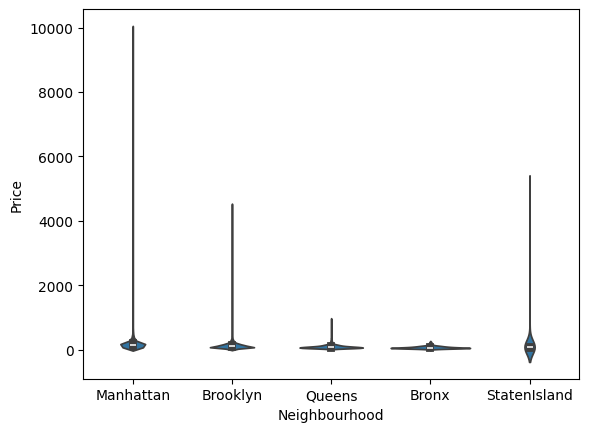

In [81]:
sns.violinplot(data=airbnb2_df, x='Neighbourhood', y="Price") #Create a plot with a grouping variable
plt.show()

In [82]:
airbnb2_df.groupby('Property Type')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,19527.0,153.880268,133.875625,20.0,89.00,130.0,190.00,10000.0
Bed & Breakfast,136.0,103.095588,64.691047,30.0,59.75,87.5,125.00,525.0
Boat,6.0,153.333333,54.006172,100.0,121.25,137.5,168.75,250.0
Bungalow,3.0,143.666667,54.197171,87.0,118.00,149.0,172.00,195.0
Cabin,2.0,165.000000,120.208153,80.0,122.50,165.0,207.50,250.0
Camper/RV,6.0,66.666667,33.595635,39.0,46.00,49.0,86.50,119.0
Castle,1.0,150.000000,NaN,150.0,150.00,150.0,150.00,150.0
Chalet,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
Condominium,48.0,241.229167,284.943760,46.0,129.75,165.0,269.75,1990.0


2 & 3.

In [84]:
#airbnb2_df['Price'] = airbnb2_df['Price'].str.replace(',', '').astype(float) #Cleaned the Price column (replaced commas, white spaces)
#Transformed the Price variable and made it a float in Line 68 of Problem 1

In [83]:
numeric_cols = ["Host Id", "Review Scores Rating", "Zipcode", "Beds", "Number of Records", "Number of Reviews", "Price"]
categorical_cols = ["Neighbourhood", "Property Type", "Room Type"]

In [85]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(airbnb2_df, test_size=0.2, random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression #Make a model where you regress price on the numeric variables alone

y_train = train_df["Price"]
x_train = train_df[numeric_cols]

model = LinearRegression()
model.fit(x_train, y_train)
y_test = test_df['Price']
x_train = train_df[numeric_cols]
x_test = test_df[numeric_cols]

display(x_train.head())

,Host Id,Review Scores Rating,Review Scores Rating,Zipcode,Beds,Number of Records,Number of Reviews,Price
18540,12727042,95.0,96.0,10021.0,1.0,1,9,95.0
28202,35031831,95.0,97.0,11235.0,1.0,1,14,65.0
19132,14133008,90.0,90.0,10022.0,1.0,1,10,85.0
16188,9668212,85.0,88.0,10029.0,2.0,1,20,220.0
560,69942,85.0,86.0,10075.0,1.0,1,90,100.0


In [87]:
y_train_cat= train_df['Price']
y_test_cat = test_df['Price']
x_train_cat = pd.get_dummies(train_df[categorical_cols], drop_first=True)
x_test_cat = pd.get_dummies(test_df[categorical_cols], drop_first=True)

display(x_train_cat.head())

,Neighbourhood_Brooklyn,Neighbourhood_Manhattan,Neighbourhood_Queens,Neighbourhood_StatenIsland,Property Type_Bed & Breakfast,Property Type_Boat,Property Type_Bungalow,Property Type_Cabin,Property Type_Camper/RV,Property Type_Castle,...,Property Type_Dorm,Property Type_House,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Room Type_Private room,Room Type_Shared room
18540,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
28202,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19132,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
16188,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
560,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


4.

In [88]:
#numeric
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train)) #R squared train
residuals=y_train-reg.predict(x_train)
print(np.sqrt(np.mean(residuals**2))) #RMSE train

1.0
7.662640568023907e-10


In [89]:
#numeric
reg2 = LinearRegression().fit(x_test, y_test)
print(reg.score(x_test, y_test)) #R squared test
residuals=y_test-reg.predict(x_test)
print(np.sqrt(np.mean(residuals**2))) #RMSE test

1.0
7.72026740807022e-10


In [90]:
#categorical
reg_cat = LinearRegression().fit(x_train_cat, y_train_cat)
print(reg_cat.score(x_train_cat, y_train_cat)) #R squared train
residuals=y_train_cat-reg_cat.predict(x_train_cat)
print(np.sqrt(np.mean(residuals**2))) #RMSE train

0.18203212133940205
137.03286832988837


In [91]:
#categorical
reg_cat_2 = LinearRegression().fit(x_test_cat, y_test_cat)
x_test_cat_aligned = x_test_cat.reindex(columns=x_train_cat.columns, fill_value=0)
print(reg_cat.score(x_test_cat_aligned, y_test_cat)) #R squared test
residuals=y_test_cat-reg_cat.predict(x_test_cat_aligned)
print(np.sqrt(np.mean(residuals**2))) #RMSE test

0.1971328154146137
124.02009225401596


In [92]:
#Make a third model that combines all the regressors from the previous two

x_train_joint = pd.concat([x_train, x_train_cat], axis=1)
x_test_joint = pd.concat([x_test, x_test_cat], axis=1)
x_train_joint, x_test_joint = x_train_joint.align(x_test_joint, join='left', axis=1, fill_value=0)
display(x_train_joint.head())

,Host Id,Review Scores Rating,Review Scores Rating,Review Scores Rating,Review Scores Rating,Zipcode,Beds,Number of Records,Number of Reviews,Price,...,Property Type_Dorm,Property Type_House,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Room Type_Private room,Room Type_Shared room
18540,12727042,95.0,95.0,96.0,96.0,10021.0,1.0,1,9,95.0,...,False,False,False,False,False,False,False,False,True,False
28202,35031831,95.0,95.0,97.0,97.0,11235.0,1.0,1,14,65.0,...,False,False,False,False,False,False,False,False,True,False
19132,14133008,90.0,90.0,90.0,90.0,10022.0,1.0,1,10,85.0,...,False,False,False,False,False,False,False,False,True,False
16188,9668212,85.0,85.0,88.0,88.0,10029.0,2.0,1,20,220.0,...,False,False,False,False,False,False,False,False,False,False
560,69942,85.0,85.0,86.0,86.0,10075.0,1.0,1,90,100.0,...,False,False,False,False,False,False,False,False,True,False


In [93]:
#joint
reg_joint = LinearRegression().fit(x_train_joint, y_train)
print(reg_joint.score(x_train_joint, y_train)) #R squared train
residuals=y_train-reg_joint.predict(x_train_joint)
print(np.sqrt(np.mean(residuals**2))) #RMSE train

1.0
7.657185351335498e-10


In [94]:
#joint
reg_joint = LinearRegression().fit(x_test_joint, y_test)
print(reg_joint.score(x_test_joint, y_test)) #R squared test
residuals=y_test-reg_joint.predict(x_test_joint)
print(np.sqrt(np.mean(residuals**2))) #RMSE test

1.0
4.85836819294951e-10


The best model would include the highest R squared test value and the lowest RMSE test value. Additionally, there should be the highest level of similarity between the train values and the test values. Based on this criteria, we believe that the joint model and the numeric model are two of the best-fitting models. For the joint model, it has the lowest RMSE test value and the highest R squared test value. However, in terms of similarity between the test and train values, the numeric model is the best one because it has the most similar train and test values. So, even though the numeric model doesn't have the lowest RMSE test value, it still possesses similarity between the test and train values, indicating less overfitting than the joint model. The joint model doesn't exactly align with the train model, so there might be potential overfitting.

5.

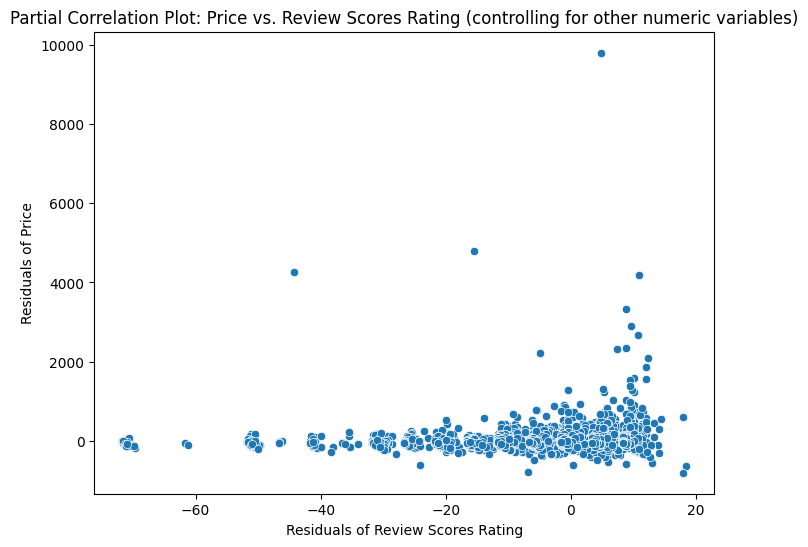

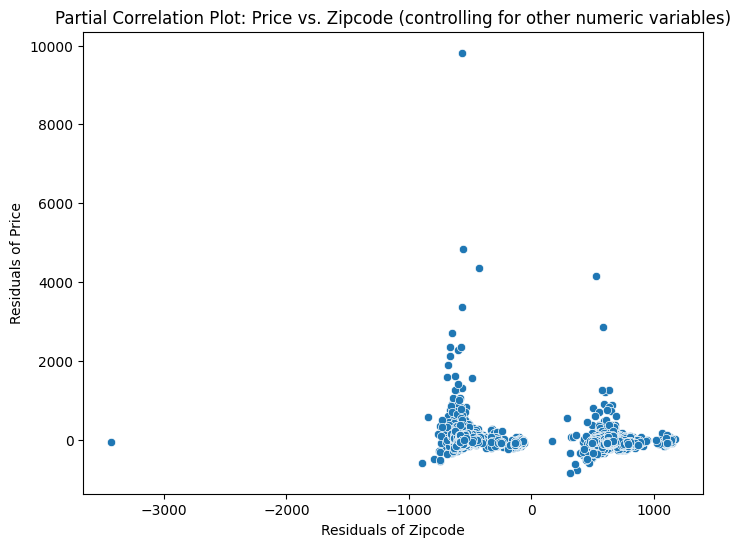

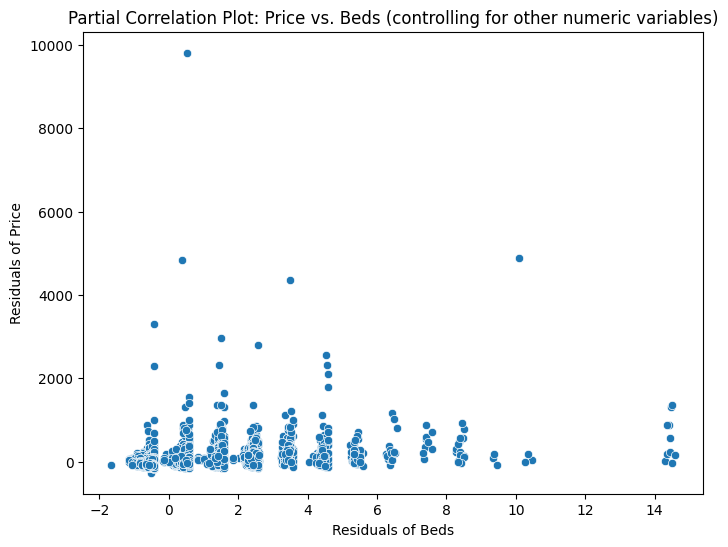

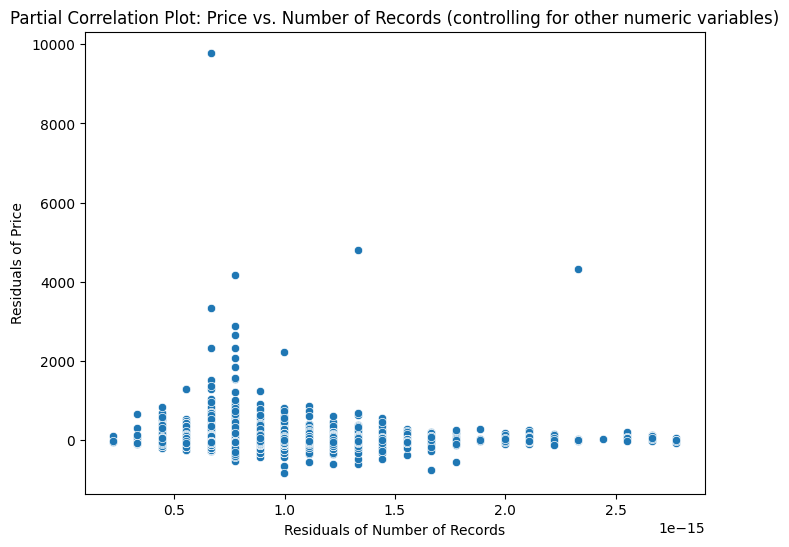

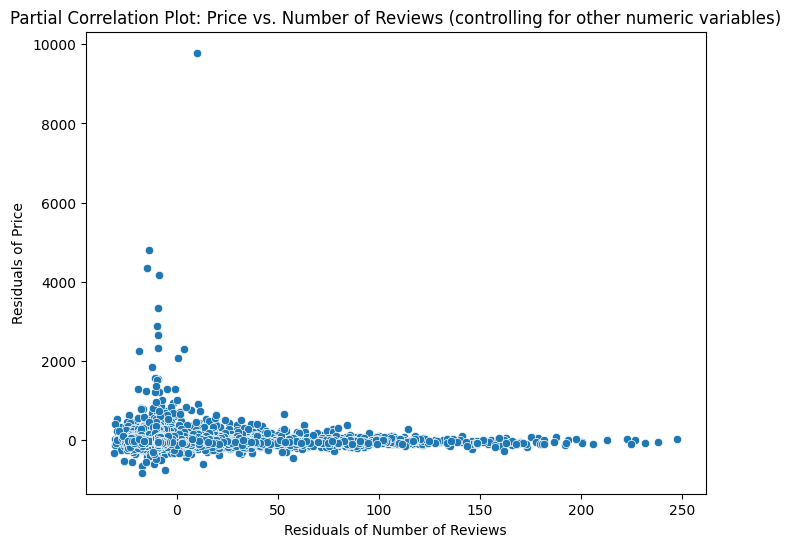

In [95]:
import statsmodels.api as sm

#Select the numeric variables used in the model
numeric_vars_model = ["Review Scores Rating", "Zipcode", "Beds", "Number of Records", "Number of Reviews"]

#Create partial correlation plots for each numeric variable against Price
for var in numeric_vars_model:
    #Ensure there's at least one other variable for the partial correlation
    other_vars = [v for v in numeric_vars_model if v != var]
    if other_vars:
        #Add a constant for the partial regression
        X = sm.add_constant(airbnb2_df[other_vars])
        y = airbnb2_df['Price']
        #Fit a model of Price on the other variables
        model_other_vars = sm.OLS(y, X).fit()
        #Get the residuals of this model
        residuals_price = model_other_vars.resid

        #Fit a model of the current variable on the other variables
        X_var = sm.add_constant(airbnb2_df[other_vars])
        #Select only one of the 'Review Scores Rating' columns if it's duplicated
        if isinstance(airbnb2_df[var], pd.DataFrame) and airbnb2_df[var].shape[1] > 1:
            y_var = airbnb2_df[var].iloc[:, 0]
        else:
            y_var = airbnb2_df[var]

        model_var = sm.OLS(y_var, X_var).fit()
        #Get the residuals of this model
        residuals_var = model_var.resid

        #Create a scatter plot of the residuals
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=residuals_var, y=residuals_price)
        plt.title(f'Partial Correlation Plot: Price vs. {var} (controlling for other numeric variables)')
        plt.xlabel(f'Residuals of {var}')
        plt.ylabel('Residuals of Price')
        plt.show()
    else:
        #If there are no other numeric variables, just plot the variable against Price
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=airbnb2_df[var], y=airbnb2_df['Price'])
        plt.title(f'Scatter Plot: Price vs. {var}')
        plt.xlabel(var)
        plt.ylabel('Price')
        plt.show()

Yes, we noticed some significant non-linearities in some of the partial correlation plots we generated. It seems like the partial correlation plot for "Zipcode" and for "Review Scores Rating" are both non-linear. This is likely because there are more categorical variables in disguise. Additionally, when we included numerical variables, it actually created horizontal lines and this likely means that a lot of the variables have colinearity which is when our predictors (variables) are strongly correlated to each other. This makes sense because when we think about variables such as "Price" and the "Number of Beds", the "Number of Reviews" and "Beds" are likely correlated to each other. People tend to give more reviews for houses with more beds because chances are, they are going to be more expensive and nicer. We encountered some significant errors when we included some more numeric variables in our partial correlation plots because too many correlated predictors leads to unstable partial residuals. This manifests as weird streaks and shapes ofund on the correlation plots, rendering them slightly useless because the model cannot differentiate the effects of each variable. These residuals essentially show shared variance rather than display actually clean linear relationships.

6.

Linear R²: 0.000724524660374648
Log R²: 8.832455198448663e-06
Quadratic R²: 0.0010102049970907023


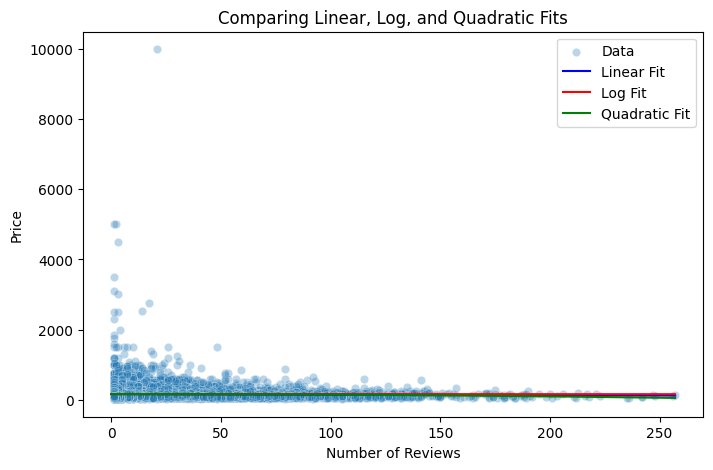

In [96]:
import statsmodels.api as sm
import numpy as np

X_lin = sm.add_constant(airbnb2_df["Number of Reviews"])
X_log = sm.add_constant(np.log1p(airbnb2_df["Number of Reviews"]))
X_quad = sm.add_constant(np.column_stack((airbnb2_df["Number of Reviews"], airbnb2_df["Number of Reviews"]**2)))

y = airbnb2_df["Price"]

m_lin = sm.OLS(y, X_lin).fit()
m_log = sm.OLS(y, X_log).fit()
m_quad = sm.OLS(y, X_quad).fit()

print("Linear R²:", m_lin.rsquared)
print("Log R²:", m_log.rsquared)
print("Quadratic R²:", m_quad.rsquared)

plt.figure(figsize=(8,5))
sns.scatterplot(x="Number of Reviews", y="Price", data=airbnb2_df, alpha=0.3, label='Data')

#Predictions
x_vals = np.linspace(0, airbnb2_df["Number of Reviews"].max(), 200)
plt.plot(x_vals, m_lin.predict(sm.add_constant(x_vals)), 'b', label='Linear Fit')
plt.plot(x_vals, m_log.predict(sm.add_constant(np.log1p(x_vals))), 'r', label='Log Fit')
plt.plot(x_vals, m_quad.predict(sm.add_constant(np.column_stack((x_vals, x_vals**2)))), 'g', label='Quadratic Fit')

plt.xlabel("Number of Reviews") #Transformation for one variable (Number of Reviews)
plt.ylabel("Price")
plt.title("Comparing Linear, Log, and Quadratic Fits")
plt.legend()
plt.show()


All the R^2 values for the above graph are extremely low for Price versus Number of Reviews, which means that number of reviews explains virtually none of the variation in price.

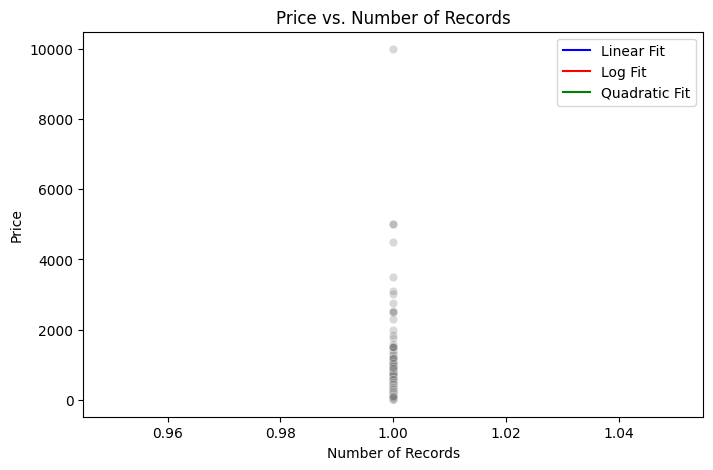

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Scatter setup
plt.figure(figsize=(8,5))
sns.scatterplot(x="Number of Records", y="Price", data=airbnb2_df, alpha=0.3, color='gray')

#Generate x values for plotting fits
x_vals = np.linspace(airbnb2_df["Number of Records"].min(), airbnb2_df["Number of Records"].max(), 200)

#Linear fit
X_lin = sm.add_constant(airbnb2_df["Number of Records"])
m_lin = sm.OLS(airbnb2_df["Price"], X_lin).fit()
plt.plot(x_vals, m_lin.predict(sm.add_constant(x_vals)), color='blue', label='Linear Fit')

#Log fit
log_x = np.log1p(airbnb2_df["Number of Records"])
X_log = sm.add_constant(log_x)
m_log = sm.OLS(airbnb2_df["Price"], X_log).fit()
plt.plot(x_vals, m_log.predict(sm.add_constant(np.log1p(x_vals))), color='red', label='Log Fit')

#Quadratic fit
X_quad = sm.add_constant(np.column_stack((airbnb2_df["Number of Records"], airbnb2_df["Number of Records"]**2)))
m_quad = sm.OLS(airbnb2_df["Price"], X_quad).fit()
plt.plot(x_vals, m_quad.predict(sm.add_constant(np.column_stack((x_vals, x_vals**2)))),
         color='green', label='Quadratic Fit')

plt.title('Price vs. Number of Records') #Second transformation of another variable (Number of Records)
plt.xlabel('Number of Records')
plt.ylabel('Price')
plt.legend()
plt.show()

In [98]:
X_lin = sm.add_constant(airbnb2_df["Number of Records"])
m_lin = sm.OLS(airbnb2_df["Price"], X_lin).fit()
r2_lin = m_lin.rsquared

#Log model
X_log = sm.add_constant(np.log1p(airbnb2_df["Number of Records"]))
m_log = sm.OLS(airbnb2_df["Price"], X_log).fit()
r2_log = m_log.rsquared

#Quadratic model
X_quad = sm.add_constant(np.column_stack((
    airbnb2_df["Number of Records"],
    airbnb2_df["Number of Records"]**2
)))
m_quad = sm.OLS(airbnb2_df["Price"], X_quad).fit()
r2_quad = m_quad.rsquared

#Print R² values
print(f"Linear R²: {r2_lin:.6f}")
print(f"Log R²: {r2_log:.6f}")
print(f"Quadratic R²: {r2_quad:.6f}")

Linear R²: 0.000000
Log R²: 0.000000
Quadratic R²: -0.000760


This transformation showcased the constancy of the "Number of Records" variable. It explains why every value is almost pretty close to 0 because the variable remains the same no matter what transformations you do. This is also reflected in the linear, log, and quadratic R^2 values because they are also close to 0, indicating less variation.

In [99]:
#Example: Creating a quadratic term for 'Review Scores Rating' and an interaction term
train_df['Review_Scores_Rating_sq'] = train_df['Review Scores Rating'].iloc[:, 0]**2
test_df['Review_Scores_Rating_sq'] = test_df['Review Scores Rating'].iloc[:, 0]**2

#You might need to decide which interactions and transformations are most appropriate based on your EDA and domain knowledge.
#For example, interaction between 'Beds' and 'Room Type' might be relevant.

#Select features for the complex model (including original, transformed, and interaction terms)
#This is just an example, you should choose your features based on your analysis
features_complex = numeric_cols + ['Review_Scores_Rating_sq'] + list(x_train_cat.columns)

#Prepare data for the complex model, ensuring columns are aligned
x_train_complex = train_df[numeric_cols + ['Review_Scores_Rating_sq']]
x_test_complex = test_df[numeric_cols + ['Review_Scores_Rating_sq']]

x_train_complex = pd.concat([x_train_complex, x_train_cat], axis=1)
x_test_complex = pd.concat([x_test_complex, x_test_cat], axis=1)

#Align columns - this is crucial when combining transformed/interaction terms with dummy variables
x_train_complex, x_test_complex = x_train_complex.align(x_test_complex, join='left', axis=1, fill_value=0)


#Fit the complex model
model_complex = LinearRegression().fit(x_train_complex, y_train)

#Evaluate the complex model on the training set
print("Complex Model - Training Set:")
print("R-squared:", model_complex.score(x_train_complex, y_train))
residuals_train_complex = y_train - model_complex.predict(x_train_complex)
print("RMSE:", np.sqrt(np.mean(residuals_train_complex**2)))

#Evaluate the complex model on the test set
print("\nComplex Model - Test Set:")
print("R-squared:", model_complex.score(x_test_complex, y_test))
residuals_test_complex = y_test - model_complex.predict(x_test_complex)
print("RMSE:", np.sqrt(np.mean(residuals_test_complex**2)))

Complex Model - Training Set:
R-squared: 1.0
RMSE: 4.024474219567425e-12

Complex Model - Test Set:
R-squared: 1.0
RMSE: 4.1365290007730174e-12


For our more complex model, the RMSE test set value is smaller than the RMSE test set value for the joint model. However, the two values for the training and test set (about 0.11) are not as similar as the two values for the training and test set for the numeric model (about 0.06). If it has the lower RMSE test set value and the higher R-squared value, it is a better model. However, if the training set values are not similar to the test set values, there might be some slight overfitting. Thus, the complex model seems to be a better model than the joint model, but it might have more overfitting than the numeric model.

7.

Overall, we ultimately discovered that the simple linear models across our analysis from problems 1 to 6 performed rather inconsistently. Numeric models showed near-perfect R² values (about 1.0) and extremely low RMSE values, suggesting possible  overfitting. On the other hand, categorical models achieved more realistic results, as evidenced by these value ranges: R² ≈ 0.18–0.20, RMSE ≈ 125–137. The joint model, which combined the numeric and categorical models, slightly improved test accuracy but still indicated overfitting. This is because the train and test R² values were both 1.0 with almost no residual error. Partial correlation plots confirmed nonlinear and clustered relationships, especially with the variables of price, zipcode, and review scores rating, which suggested that transformations were needed in order to capture more reasonable/better-fitting patterns.

After coding for transformations, like logarithmic and quadratic R² values, and interaction terms, the complex model again achieved an R² of 1.0 and very small RMSE values. Although this implies a perfect fit, it also indicates overfitting rather than a realistic predictive performance of the model. Through this lab, we learned a lot about underfitting and overfitting and how that can impact the selection of a model that best represents our data.

8.

In [100]:
from sklearn.linear_model import Lasso

#Initialize and fit the Lasso model
#We'll use the complex model features for Lasso
lasso_model = Lasso(alpha=1.0) # You might need to tune the alpha parameter
lasso_model.fit(x_train_complex, y_train)

#Get the selected features (non-zero coefficients)
lasso_coef = pd.Series(lasso_model.coef_, index=x_train_complex.columns)
selected_features = lasso_coef[lasso_coef != 0].index.tolist()

print("Features selected by Lasso:")
print(selected_features)

#Evaluate the Lasso model on the training set
print("\nLasso Model - Training Set:")
print("R-squared:", lasso_model.score(x_train_complex, y_train))
residuals_train_lasso = y_train - lasso_model.predict(x_train_complex)
print("RMSE:", np.sqrt(np.mean(residuals_train_lasso**2)))

#Evaluate the Lasso model on the test set
print("\nLasso Model - Test Set:")
#Ensure test set columns are aligned with training set columns
x_test_complex_aligned = x_test_complex.reindex(columns=x_train_complex.columns, fill_value=0)
print("R-squared:", lasso_model.score(x_test_complex_aligned, y_test))
residuals_test_lasso = y_test - lasso_model.predict(x_test_complex_aligned)
print("RMSE:", np.sqrt(np.mean(residuals_test_lasso**2)))

Features selected by Lasso:
['Host Id', 'Price']

Lasso Model - Training Set:
R-squared: 0.9999999981023938
RMSE: 0.006600239015940571

Lasso Model - Test Set:
R-squared: 0.9999999981000565
RMSE: 0.006033100199122814


The Lasso Model we used to regularize our model selected the following predictive features: "Host Id" and "Price". The training set R-squared value was 0.9999999981023938 and the training set RMSE value was 0.006600239015940571. The test set R-squared value was 0.9999999981000565 and the test set RMSE value was 0.006033100199122814.